<img  src=http://repository.icesi.edu.co/biblioteca_digital/image/icesi-logo.svg height="250" width="250">

**Author: Kevin Balanta - Brayan Bejarano - Bayron Campaz - Juan David Diaz**
        

# Implementacion de KNN

La siguiente es una implementacion que usa el algoritmo Knn desde la libreria sklearn para la prediccion de numeros como un conjunto de imagenes.

In [1]:
from sklearn.datasets import load_digits
import sklearn.metrics as metrics
import pylab as pl
import sklearn
import math

In [2]:
digits = load_digits()
percentFit = 0.8
numImagenes = len(digits.images)
limitInferior =  math.floor(numImagenes*percentFit)+1
limitSuperior = math.ceil(numImagenes*percentFit)

In [3]:
y = digits.target[0 : limitInferior] # El método nos provee las etiquetas de las imágenes en un arreglo
w = digits.target[limitSuperior :]

Para poder simplificar la representación de los datos, se pueden aplanar las matrices de pixeles para poner cada imagen en un solo array de 64 pixeles:

In [4]:
X = digits.images[0 : limitInferior].reshape((len(y), -1)) # Se selecciona el porcentaje de entrenamiento.
Z = digits.images[limitSuperior :].reshape((len(w),-1))

## Aprendizaje automático

In [5]:
#from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import pylab as plt

knn = KNeighborsClassifier(4)
fit = knn.fit(X, y)

Se pueden evaluar las clases estimadas por el modelo vs. las clases reales

In [6]:
w_estimado = fit.predict(Z)
print("Reales   :", w[0:25])
print("Estimados:", w_estimado[0:25])

Reales   : [3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1]
Estimados: [3 4 5 6 7 8 9 0 9 5 5 6 5 0 9 8 9 8 4 1 7 7 3 5 1]


Podemos tener una idea más clara de los casos en los que se equivoca el modelo:

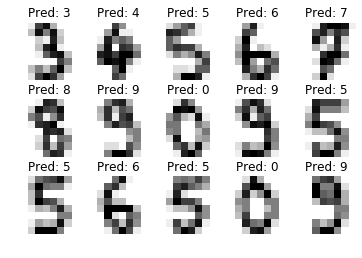

In [7]:
images_and_predictions = list(zip(digits.images[limitSuperior :], w_estimado))
for index, (image, prediction) in enumerate(images_and_predictions[:15]):
    plt.subplot(3,5, index+1) #se crean los placeholders de 3x5 filasXcolumnas
    plt.axis('off')  #se quitan los ejes
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title('Pred: %i' % prediction)
plt.show()

Nos gustaría tener una idea de la correctitud global del modelo aprendido.

In [8]:
metrics.accuracy_score(w, w_estimado)

0.9665738161559888

Finalmente el dato anterior muestra la efectividad del metodo usado para este problema en particular con unos valores de entrenamiento y de pruebas determinados.